In [41]:

#Python 3 notebook
import numpy as np
import pandas as pd
from functools import reduce
from math import floor, ceil


In [42]:
df = pd.read_csv('data.csv',header = 1, names =['date', 'prices', 'gold', 'compound', 'neg', 'neu', 'pos' ] )
df = df.set_index('date')
#Obtaining the past data in a different column
df['past_prices'] = df.loc[:,'prices'].shift(30)
df = df.iloc[30:df.shape[0]]
#Splitting train and test dataset
train_size = floor(0.8*df.shape[0])
train = df.iloc[0:train_size]
test = df.iloc[train_size:]
print('Total data size: ',df.shape[0],'. Train data size: ', train.shape[0], '. Test data size: ', test.shape[0], '.',sep='')

Total data size: 1152. Train data size: 921. Test data size: 231.


In [43]:
#df


In [44]:
#train


In [45]:
#test

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:56: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=10,min_periods=0,adjust=True,ignore_na=False).mean()
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:58: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=10,min_periods=0,adjust=True,ignore_na=False).mean()


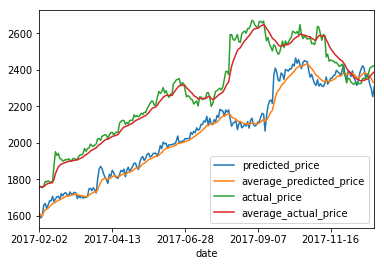

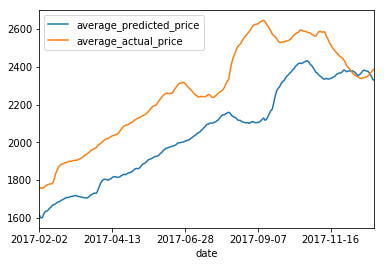

In [46]:
from treeinterpreter import treeinterpreter as ti
from sklearn.linear_model import LinearRegression
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

# average_upcoming_5_days_predicted += predictions_df.loc[temp_date, 'prices']
# # Converting string to date time
# temp_date = datetime.strptime(temp_date, "%Y-%m-%d").date()
# # Adding one day from date time
# difference = temp_date + timedelta(days=1)
# # Converting again date time to string
# temp_date = difference.strftime('%Y-%m-%d')
        
# start_year = datetime.strptime(train_start_date, "%Y-%m-%d").date().month


prediction_list = []

sentiment_score_list = []
for date, row in train.T.iteritems():
    sentiment_score = np.asarray([train.loc[date, 'gold'],train.loc[date, 'compound'],train.loc[date, 'neg'],train.loc[date, 'neu'],train.loc[date, 'pos'],train.loc[date, 'past_prices']])
    #sentiment_score = np.asarray([df.loc[date, 'neg'],df.loc[date, 'pos']])
    sentiment_score_list.append(sentiment_score)
numpy_df_train = np.asarray(sentiment_score_list)
sentiment_score_list = []
for date, row in test.T.iteritems():
    sentiment_score = np.asarray([test.loc[date, 'gold'],test.loc[date, 'compound'],test.loc[date, 'neg'],test.loc[date, 'neu'],test.loc[date, 'pos'],test.loc[date, 'past_prices']])
    #sentiment_score = np.asarray([df.loc[date, 'neg'],df.loc[date, 'pos']])
    sentiment_score_list.append(sentiment_score)
numpy_df_test = np.asarray(sentiment_score_list)

 # Generating models
lr = LinearRegression()
lr.fit(numpy_df_train, train['prices'])

prediction = lr.predict(numpy_df_test)
prediction_list.append(prediction)
#print train_start_date + ' ' + train_end_date + ' ' + test_start_date + ' ' + test_end_date

test_start_date = '2017-01-27'
test_end_date = '2018-01-02'
#train_start_date = '2013-05-13'
#train_end_date = '2017-01-26'
#idx = pd.date_range(test_start_date, test_end_date)
idx = test.index
#print year
predictions_df_list = pd.DataFrame(data=prediction[0:], index = idx, columns=['prices'])
    
#difference_test_predicted_prices = offset_value(test_start_date, test, predictions_df_list,idx)
# Adding offset to all the advpredictions_df price values
#predictions_df_list['prices'] = predictions_df_list['prices'] + difference_test_predicted_prices

#predictions_df_list['actual_value'] = test['prices']
#predictions_df_list.plot()
# Smoothing the plot
predictions_df_list['ewma'] = pd.ewma(predictions_df_list["prices"], span=10)
predictions_df_list['actual_value'] = test['prices']
predictions_df_list['actual_value_ewma'] = pd.ewma(predictions_df_list["actual_value"], span=10)
# Changing column names
predictions_df_list.columns = ['predicted_price', 'average_predicted_price', 'actual_price', 'average_actual_price']
predictions_df_list.plot()
predictions_df_list_average = predictions_df_list[['average_predicted_price', 'average_actual_price']]
predictions_df_list_average.plot()
#plt.plot( range(0,test.shape[0]), predictions_df_list, range(0,test.shape[0]), test_data.loc[:,'prices'].as_matrix())
#predictions_df_list.show()
plt.show()




    


In [47]:
lr.coef_

array([  2.45403446e-01,  -3.62742563e-03,   7.23669042e+03,
         6.49595160e+03,   6.31517930e+03,   7.98938018e-01])

In [48]:
lr.intercept_


-6587.1494594079877

In [49]:
from sklearn import metrics
import numpy as np


# calculate MAE using scikit-learn
mae=metrics.mean_absolute_error(test['prices'], predictions_df_list['predicted_price'])
print('MAE:',mae)


MAE: 224.780564322
